In [1]:
import numpy as np
import matplotlib.pyplot as plt

101
101


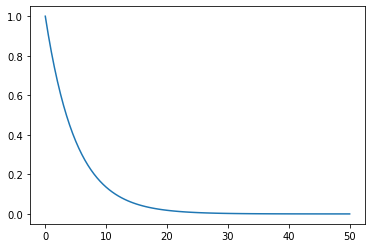

In [70]:
# Time vars
T = 50
dt = 0.5
time = np.arange(0, T+dt, dt)
tau_w = 5

# Define activity time series
KC_time = np.arange(int(2/dt), int(6/dt))
r_KC = np.zeros(time.size)
r_KC[KC_time] = 1
# r_KC[2] = 1
print(r_KC.size)
DAN_time = np.arange(int(6/dt), int(10/dt))
r_DAN = np.zeros(time.size)
r_DAN[DAN_time] = 1
# r_DAN[4] = 1

# Define the filter
ht = np.exp(-time / tau_w)
plt.plot(time, ht)
# print(ht[-0:])
# print(ht[:-1])
print(ht.size)


0.5786634037429368


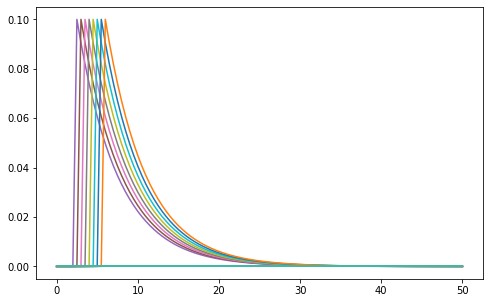

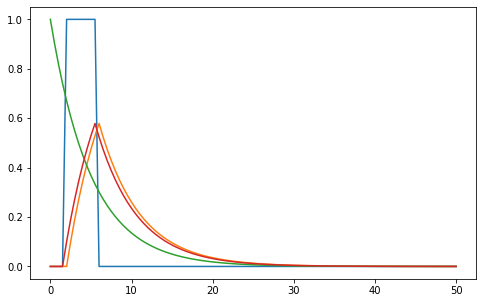

In [73]:
# Convolve ht with one of the inputs
out1 = np.zeros(time.size)
out2 = np.zeros(time.size)
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for t in range(time.size - 1):
    new_sum1 = ht[:-(t+1)] * r_KC[t] * dt / tau_w
    next_sum = np.zeros(time.size)
    next_sum[(t+1):] = new_sum1
    ax.plot(time, next_sum)
    out1[t+1:] += new_sum1
#     new_sum2 = ht[:-(t+1)] * r_DAN[t] * dt
#     out2[t+1:] += new_sum2
    
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.plot(time, r_KC)
ax.plot(time, out1)
ax.plot(time, ht)
ax.plot(time, np.convolve(r_KC, ht, mode='full')[:time.size] * dt / tau_w)
# ax.plot(time, out2)
print(np.max(out1))


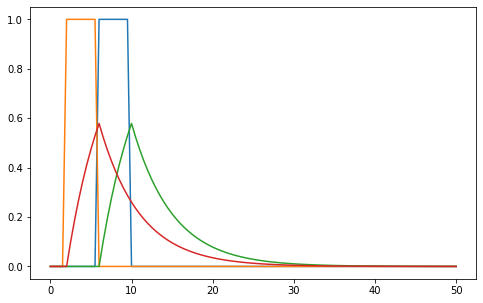

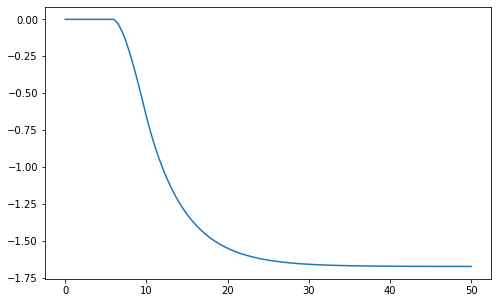

In [74]:
# Convolve ht with one of the inputs
r_bar_KC = np.zeros(time.size)
r_bar_DAN = np.zeros(time.size)
wt = np.zeros(time.size)
Wt = np.zeros(time.size)

for t in range(time.size - 1):
    DAN_trace = ht[:-(t+1)] * r_DAN[t] * dt / tau_w
    r_bar_DAN[t+1:] += DAN_trace
    KC_trace = ht[:-(t+1)] * r_KC[t] * dt / tau_w
    r_bar_KC[t+1:] += KC_trace
    
    dw = (r_bar_DAN[t] * r_KC[t] - r_bar_KC[t] * r_DAN[t]) * dt
    wt[t+1] = wt[t] + dw
    dW = (-Wt[t] + wt[t+1]) * dt / tau_w
    Wt[t+1] = Wt[t] + dW
    
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.plot(time, r_DAN)
ax.plot(time, r_KC)
ax.plot(time, r_bar_DAN)
ax.plot(time, r_bar_KC)

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.plot(time, Wt)
